In [16]:
#Tugas Event #2 - Solving Real-World Problems with Data Science
#Nama : Yusuf Qisthi Abdul Jabbar
#NIM : 24060120140134
#Universitas : Universitas Diponegoro
#Tanggal Mulai : 08 November 2020
#Sumber Dataset : Survey mahasiswa jurusan Informatika Undip angkatan 2020

In [2]:
#import library panda dan NearestNeighbors dari sklearn
import pandas as pd
from sklearn.neighbors import NearestNeighbors
#membaca file csv
df = pd.read_csv('respons2.csv')
#menampilkan data csv (headnya saja)
df.head()

,Timestamp,Siapa nama kamu?,Apa gender kamu?,Seberapa penting fisik pasangan bagi kamu?,Seberapa penting selera humor bagi kamu?,Seberapa penting keromantisan bagi kamu?,Seberapa penting perhatian pacar bagi kamu?,Seberapa penting cara berpikir pacar bagi kamu?,Seberapa penting quality time dengan pacar?,Seberapa penting keseriusan bagi kamu?,Tambahan lain? (tidak wajib diisi)
0,11/1/2020 18:00:05,Citra putri raissa,Cewek,3,5,2,3,5,2,3,"Serius itu tergantung sama pasangan kita juga,..."
1,11/1/2020 18:05:17,Wildan Kamal Allam,Cowok,3,3,4,5,5,5,5,Cariin cewe dong 🙁
2,11/1/2020 18:06:21,Jodohmu,Cowok,4,4,3,4,5,5,4,Seagama
3,11/1/2020 18:06:45,Atika Resti Rahmanda,Cewek,4,5,1,1,5,5,5,NaN
4,11/1/2020 18:08:11,Novia Dewi Maharani,Cewek,2,4,4,5,5,4,5,NaN


In [3]:
#Menghapus Kolom timestamp karena tidak dibutuhkan dan kolom komentar karena tidak punta nilai kuantitatif
df = df.iloc[:, 1:-1]
df.head()

,Siapa nama kamu?,Apa gender kamu?,Seberapa penting fisik pasangan bagi kamu?,Seberapa penting selera humor bagi kamu?,Seberapa penting keromantisan bagi kamu?,Seberapa penting perhatian pacar bagi kamu?,Seberapa penting cara berpikir pacar bagi kamu?,Seberapa penting quality time dengan pacar?,Seberapa penting keseriusan bagi kamu?
0,Citra putri raissa,Cewek,3,5,2,3,5,2,3
1,Wildan Kamal Allam,Cowok,3,3,4,5,5,5,5
2,Jodohmu,Cowok,4,4,3,4,5,5,4
3,Atika Resti Rahmanda,Cewek,4,5,1,1,5,5,5
4,Novia Dewi Maharani,Cewek,2,4,4,5,5,4,5


In [4]:
#Merename kolom supaya mudah dipanggil
df.columns = ['name', 'gender', 'physic', 'humor', 'roman', 'attention', 'logic', 'qt', 'serious']
df.head()

,name,gender,physic,humor,roman,attention,logic,qt,serious
0,Citra putri raissa,Cewek,3,5,2,3,5,2,3
1,Wildan Kamal Allam,Cowok,3,3,4,5,5,5,5
2,Jodohmu,Cowok,4,4,3,4,5,5,4
3,Atika Resti Rahmanda,Cewek,4,5,1,1,5,5,5
4,Novia Dewi Maharani,Cewek,2,4,4,5,5,4,5


In [5]:
#Mengklasifikasikan gender laki-laki dan perempuan
df['gender'] = df['gender'].apply(lambda x:0 if x == 'Cowok' else 1)

In [6]:
m_df = df[df['gender'] == 0]
f_df = df[df['gender'] == 1]

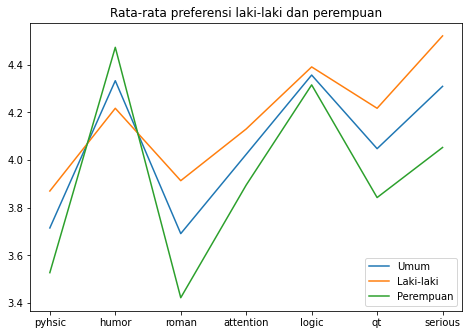

In [7]:
#Mengimport matplotlib untuk menampilkan grafik
import matplotlib.pyplot as plt

#Menentukan nilai axis x dan y
x_ax = ["pyhsic", "humor", "roman", "attention", "logic", "qt", "serious"]
y_ax = [df.physic.mean(), df.humor.mean(), df.roman.mean(), df.attention.mean(), df.logic.mean(), df.qt.mean(), df.serious.mean()]
y_m = [m_df.physic.mean(), m_df.humor.mean(), m_df.roman.mean(), m_df.attention.mean(), m_df.logic.mean(), m_df.qt.mean(), m_df.serious.mean()]
y_f = [f_df.physic.mean(), f_df.humor.mean(), f_df.roman.mean(), f_df.attention.mean(), f_df.logic.mean(), f_df.qt.mean(), f_df.serious.mean()]

#Menentukan atribut grafik
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Rata-rata preferensi laki-laki dan perempuan")

plt.plot(x_ax, y_ax, label="Umum")
plt.plot(x_ax, y_m, label="Laki-laki")
plt.plot(x_ax, y_f, label="Perempuan")

ax.legend()

In [8]:
#Insight 1: Laki-laki sangat mempertimbangkan keseriusan perempuan
#Insight 2: Perempuan sangat mempertimbangkan humor dari laki-laki
#Insight 3: Keromantisan dinilai paling kurang berpengaruh dari semua preferensi

In [9]:
#Mengkalisifikasikan nama berdasarkan gender
m_x = m_df.drop(['name', 'gender'], axis=1)
f_x = f_df.drop(['name', 'gender'], axis=1)

In [10]:
#Mengaplikasikan NearestNeighbors untuk mencari kedekatan dari lawan jenis
m_nbrs = NearestNeighbors(n_neighbors=1).fit(m_x)
f_nbrs = NearestNeighbors(n_neighbors=1).fit(f_x)

In [11]:
#Mengambil nama sebagai uji coba test 1
x = df.drop(['name', 'gender'], axis=1)
test = x[df['name'] == 'Citra putri raissa'].values
_, idx = m_nbrs.kneighbors(test)
m_df.iloc[idx[0]]['name']

31    rafli
Name: name, dtype: object

In [12]:
#Insight 4: Citra mempunyai preferensi yang mirip dengan Rafly

In [13]:
#Mengambil nama sebagai uji coba test 1
test = x[df['name'] == 'Cup'].values
_, idx = f_nbrs.kneighbors(test)
f_df.iloc[idx[0]]['name']

6    nadya mumtazah
Name: name, dtype: object

In [14]:
#Insight 5: Cup mempunyai preferensi yang mirip dengan Nadya